In [1]:
import pandas as pd
import numpy as np

c:\Users\Alfre\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [47]:
df = pd.read_csv('precios_autos.csv')
ordf = df.copy()
df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 21)

En el dataframe contamos con 21 features y 205 observaciones.

In [4]:
df.head(1)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0


In [8]:
#ver los tipos de datos
df.dtypes


symboling             int64
CarName              object
fueltype             object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Podemos ver que tenemos varias variables categoricas, por lo cual es necesario convertirlas a variables numericas para poder trabajar con ellas.

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Categorical Data - Nominal (Label Encoding)
label_encoder = LabelEncoder()
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])


# Use get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=['fueltype', 'carbody','drivewheel', 'enginelocation', 'enginetype'],  drop_first=True)

In [6]:
df

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,stroke,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,2,130,2.68,...,0,0,1,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,2,130,2.68,...,0,0,1,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,3,152,3.47,...,0,0,1,0,0,0,0,0,1,0
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,2,109,3.40,...,0,1,0,0,0,0,1,0,0,0
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,1,136,3.40,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,2,141,3.15,...,0,0,1,0,0,0,1,0,0,0
201,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,2,141,3.15,...,0,0,1,0,0,0,1,0,0,0
202,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,3,173,2.87,...,0,0,1,0,0,0,0,0,1,0
203,-1,volvo 246,109.1,188.8,68.9,55.5,3217,3,145,3.40,...,0,0,1,0,0,0,1,0,0,0


Despues de aplicar la transformacion a variables dummy para las variables categoricas y usar labelencoder para volver numericas las variables que tienen un orden, nos quedamos con 30 features. Igualmente es importante recordar que para el modelo de regresion lineal, se debe eliminar una de las variables dummy para evitar la el problema de la multicolinearidad perfecta.

In [7]:
df.isna().sum()

symboling              0
CarName                0
wheelbase              0
carlength              0
carwidth               0
carheight              0
curbweight             0
cylindernumber         0
enginesize             0
stroke                 0
compressionratio       0
horsepower             0
peakrpm                0
citympg                0
highwaympg             0
price                  0
fueltype_gas           0
carbody_hardtop        0
carbody_hatchback      0
carbody_sedan          0
carbody_wagon          0
drivewheel_fwd         0
drivewheel_rwd         0
enginelocation_rear    0
enginetype_dohcv       0
enginetype_l           0
enginetype_ohc         0
enginetype_ohcf        0
enginetype_ohcv        0
enginetype_rotor       0
dtype: int64

De igual forma podemos observar que no contamos con valores nulos en el dataframe, así que podemos seguir trabajando con el sin problema. A continuación vamos a ver como se distribuyen las variables númericas

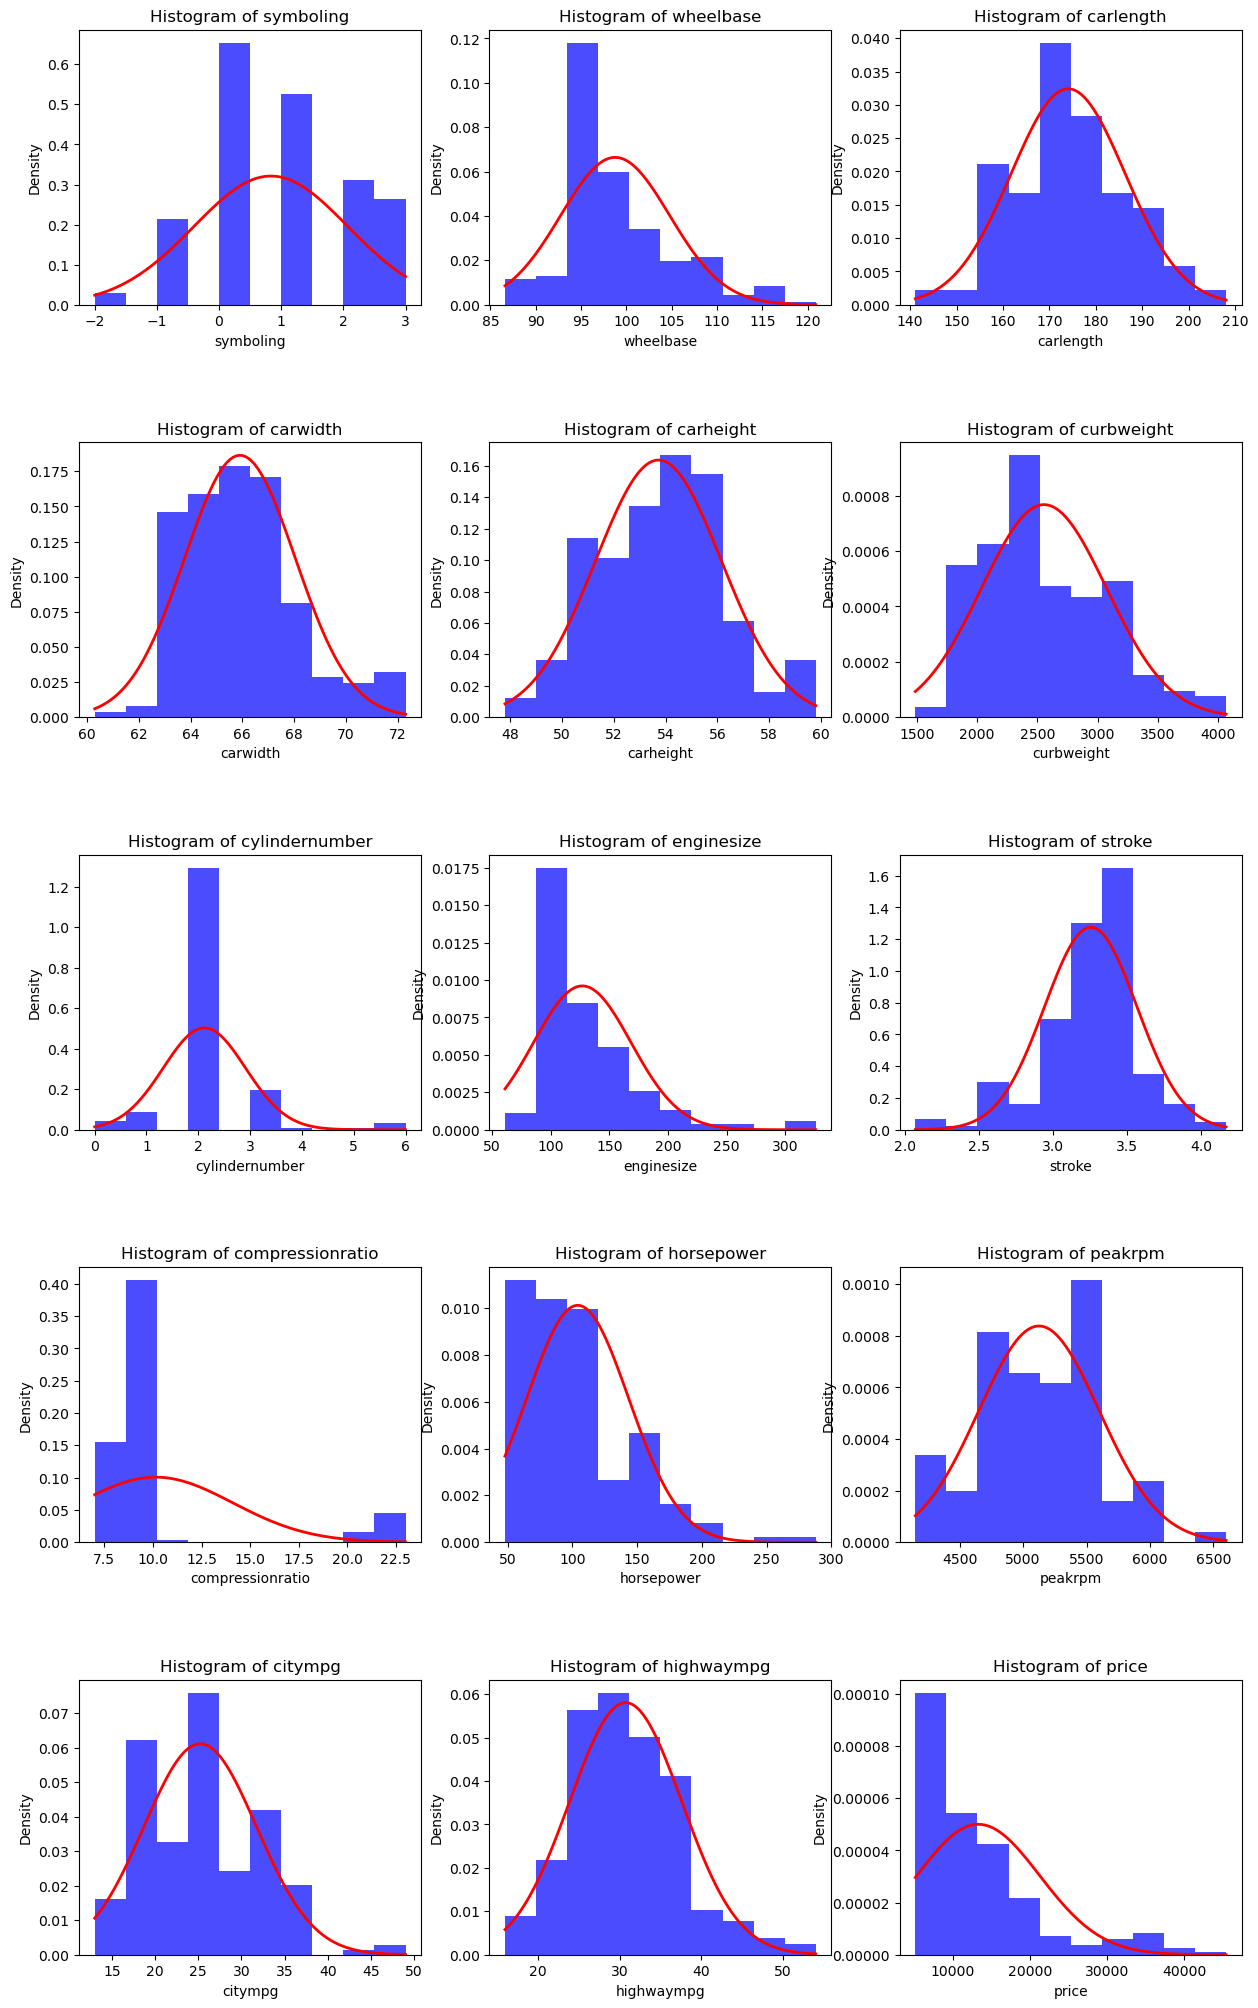

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=np.number)

numeric_df = numeric_df[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

# Determine the number of rows and columns for subplots
num_cols = len(numeric_df.columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Calculate the number of rows based on 3 plots per level

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, col_name in enumerate(numeric_df.columns):
    row, col = i // 3, i % 3
    X1 = numeric_df[col_name]
    title_ = f'Histogram of {col_name}'
    ax = axes[row, col]
    
    ax.hist(X1, density=True, color='blue', alpha=0.7)
    x = np.linspace(min(X1), max(X1), 100)
    y = stats.norm.pdf(x, loc=np.mean(X1), scale=np.std(X1))
    ax.plot(x, y, 'r-', linewidth=2)
    ax.set_title(title_)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Density')

# Remove any unused subplots
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

Podemos ver que las variables cuya distribución se asemeja más a la de una normal  asimple vista son:

- highwaympg
- carlenght
- peakrpm
- carheight
- carwidth

In [9]:
numeric_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,2.117073,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,0.795792,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,2.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,2.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,2.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Podemos ver que entre las variables que nos parecieron interesantes al mirar la distribución obtenemos que la media de los datos se encuentra practicamente en la mitad del intervalo y en los casos en los que no es así podemos ver que aun se mantiene entre el IQR (intervalo intercuartilico) por lo que confirmamos el analisis que hicimos anteriormente con los histogramas.

In [10]:
# List of qualitative variables
qualitative_vars = ['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

# Perform frequency analysis for each qualitative variable
for var in qualitative_vars:
    frequency_table = ordf[var].value_counts().reset_index()
    frequency_table.columns = [var, 'Frequency']
    print(frequency_table)
    print("\n")

  fueltype  Frequency
0      gas        185
1   diesel         20


       carbody  Frequency
0        sedan         96
1    hatchback         70
2        wagon         25
3      hardtop          8
4  convertible          6


  drivewheel  Frequency
0        fwd        120
1        rwd         76
2        4wd          9


  enginelocation  Frequency
0          front        202
1           rear          3


  enginetype  Frequency
0        ohc        148
1       ohcf         15
2       ohcv         13
3       dohc         12
4          l         12
5      rotor          4
6      dohcv          1


  cylindernumber  Frequency
0           four        159
1            six         24
2           five         11
3          eight          5
4            two          4
5          three          1
6         twelve          1




Podemos ver al analizar las frecuencias en las variables categoricas que en la mayoría de las variable shay un desbalance muy marcado entre las categorias, por lo que es necesario tener cuidado al momento de hacer el split de los datos para el entrenamiento y la prueba al modelar. Además de esto antes de descartarlas tenemos que ver si nos pueden aportar información relevante para el análisis.

c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaco

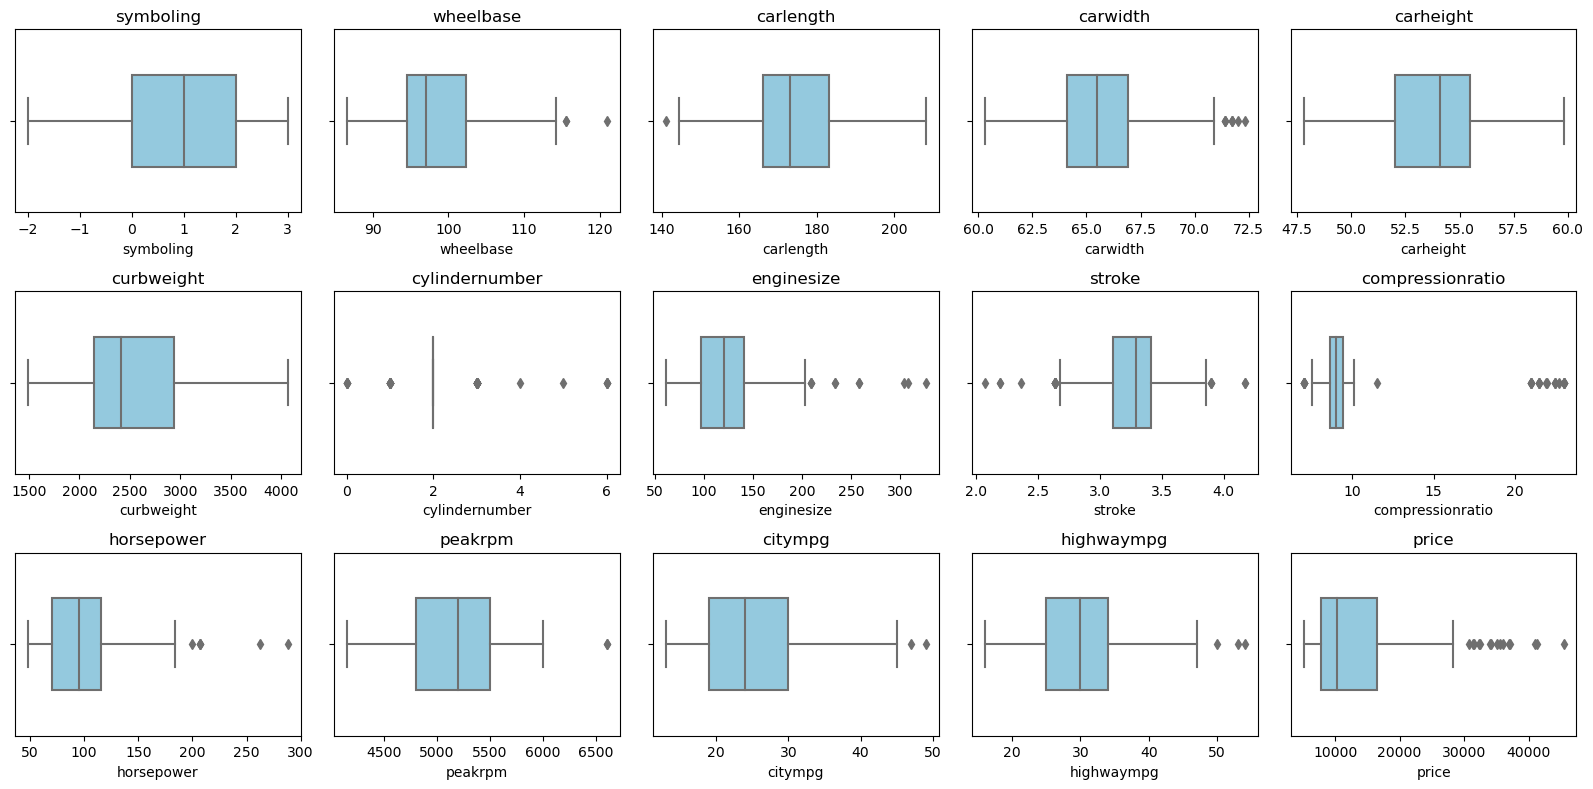

In [11]:
import seaborn as sns

# Lista de variables numéricas
numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Crear subplots para los boxplots
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.5)

# Crear boxplots para cada variable numérica
for i, var in enumerate(numeric_df, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=numeric_df[var], orient="vertical", width=0.5, color="skyblue")
    plt.title(var)

# Mostrar los boxplots
plt.tight_layout()
plt.show()

Podemos ver que en las variables numericas tenemos una distribución de los datos muy similar a la de una normal en las variables que habíamos notado en un inicio viendo los histogramas, a excepción de la variable price, pero que debido a la natulareza de la variable y a la información que aporta he decidido no modificarla.

Despues de ver como se distribuyen los datos y el tema de los valores atipicos vamos a hacer ahora un analisis de las correlaciones en las variables para poder aplicar un modelo de ML viable que nos ayude a predecir el precio de los carros.

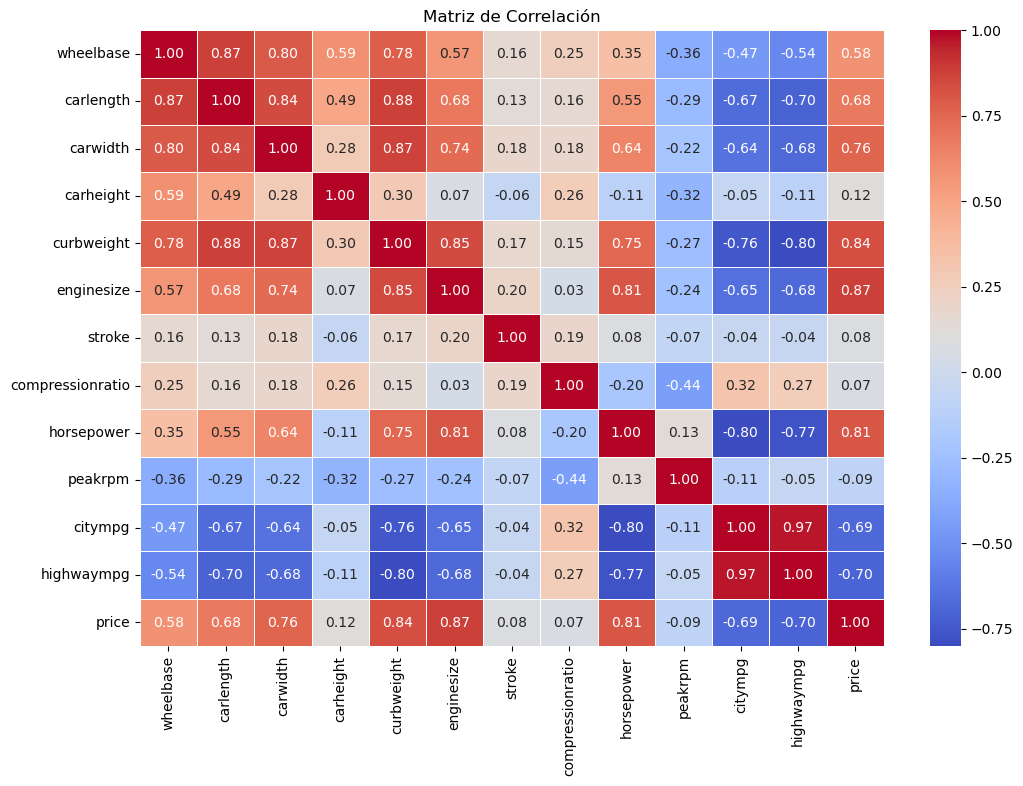

In [12]:
#creamos un 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'data' con tus datos.
# Si no lo tienes, debes cargar tus datos en un DataFrame primero.

numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Calcular la matriz de correlación
correlation_matrix = numeric_df[numeric_vars].corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


In [14]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'data' con tus datos.
# Si no lo tienes, debes cargar tus datos en un DataFrame primero.

numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Calcular las correlaciones con respecto a la variable "price"
correlations_with_price = numeric_df[numeric_vars].corr()['price'].sort_values(ascending=False)

# Imprimir las correlaciones ordenadas de mayor a menor
print("Correlaciones con la variable 'price' (ordenadas de mayor a menor):")
print(correlations_with_price)


Correlaciones con la variable 'price' (ordenadas de mayor a menor):
price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


Podemos ver quee al menos las 6 variables con el coeficiente de correlacion de pearson mas alto con la vairbale precio estann arriba de 0.65 por lo que podemos decir que son variables que tienen una correlacion fuerte con la variable precio. Por lo que podemos decir que son variables que nos pueden ayudar a predecir el precio de los carros y estaría bien incluirlas en el modelo, después d eeste analisis podemos enfocarnos en estudiar la relacion de las variables categricas con precio, ademas de verificar el coeficiente de verosimilitud para evitar problemas de multicolinearidad con estas variables.

In [17]:
df

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,stroke,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,2,130,2.68,...,0,0,1,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,2,130,2.68,...,0,0,1,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,3,152,3.47,...,0,0,1,0,0,0,0,0,1,0
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,2,109,3.40,...,0,1,0,0,0,0,1,0,0,0
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,1,136,3.40,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,2,141,3.15,...,0,0,1,0,0,0,1,0,0,0
201,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,2,141,3.15,...,0,0,1,0,0,0,1,0,0,0
202,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,3,173,2.87,...,0,0,1,0,0,0,0,0,1,0
203,-1,volvo 246,109.1,188.8,68.9,55.5,3217,3,145,3.40,...,0,0,1,0,0,0,1,0,0,0


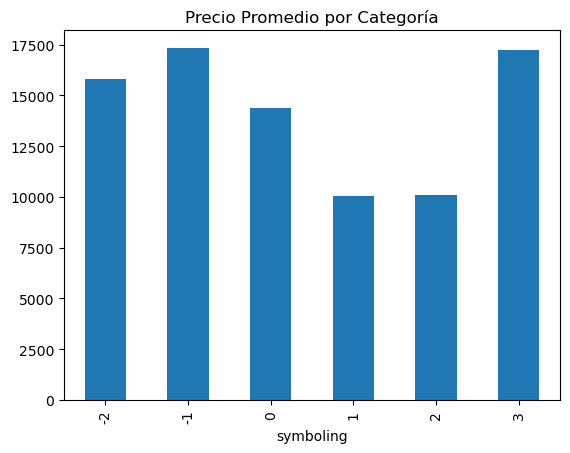

In [18]:
import matplotlib.pyplot as plt

# Supongamos que tienes una variable categórica llamada 'categoria' en tu DataFrame
df.groupby('symboling')['price'].mean().plot(kind='bar')
plt.title('Precio Promedio por Categoría')
plt.xticks(rotation=90)
plt.show()


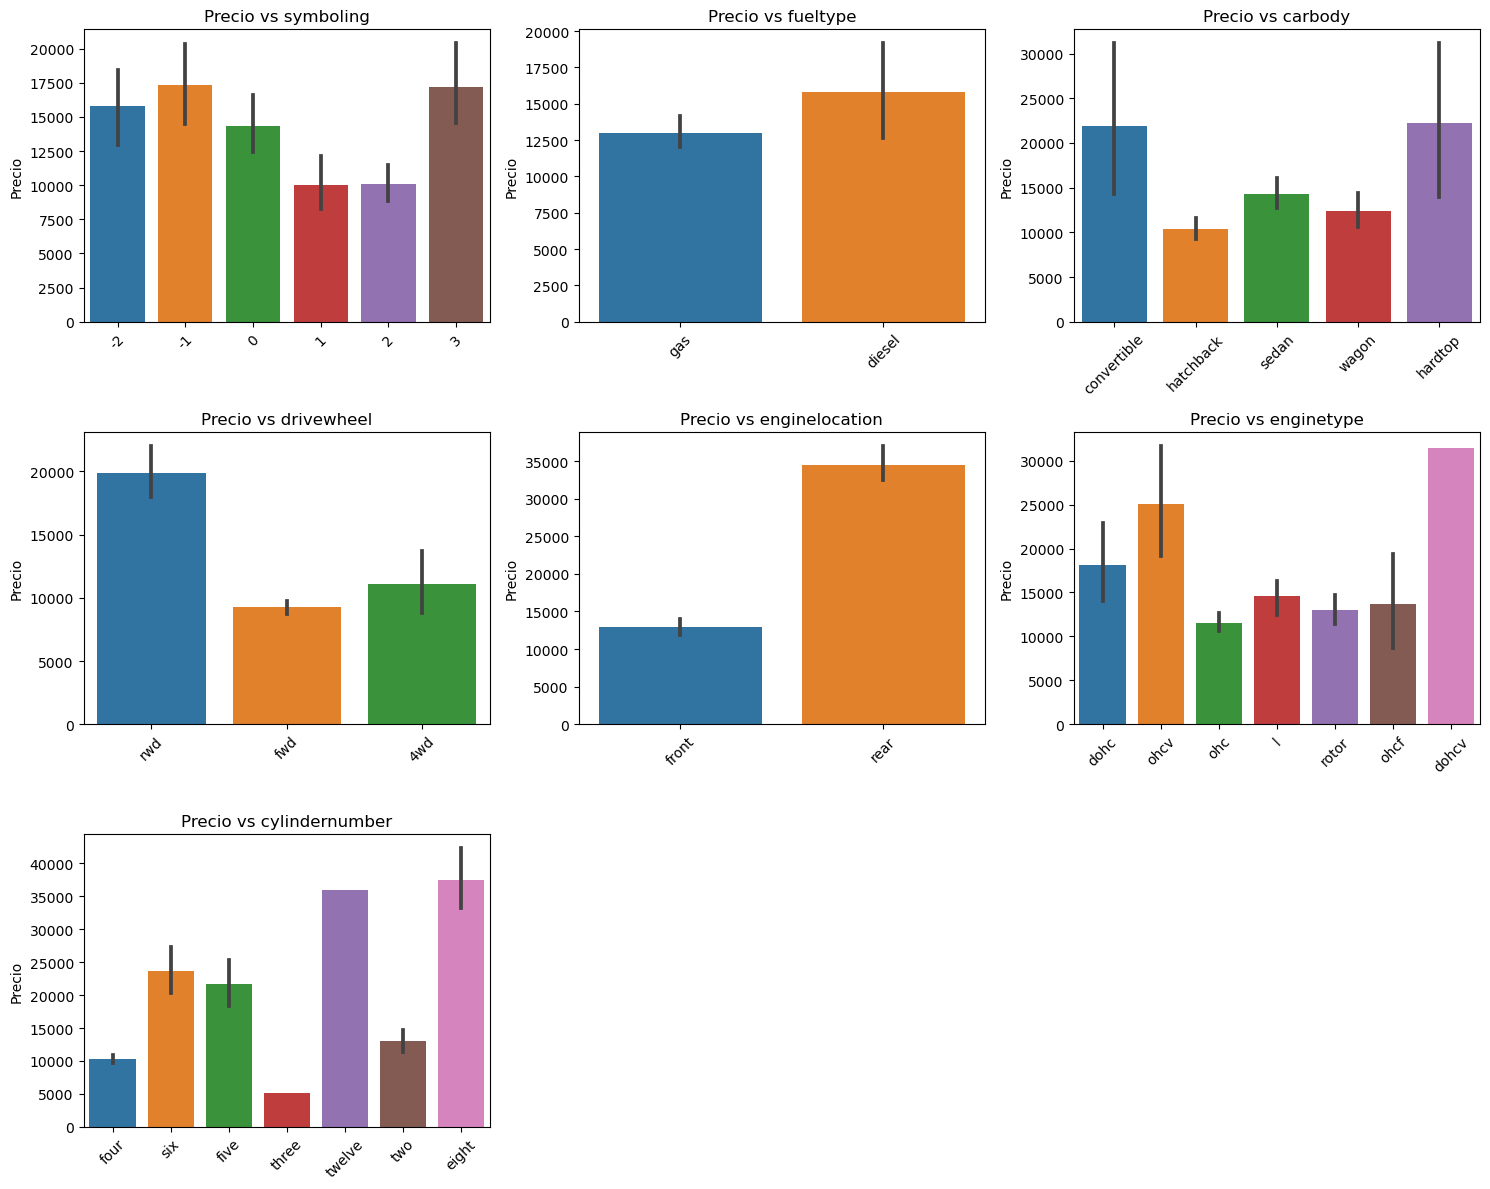

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

qualitative_vars = ['symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

# Crear un subplot de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(qualitative_vars):
    row = i // 3
    col = i % 3
    
    # Crear un gráfico de barras para la variable categórica
    sns.barplot(x=var, y='price', data=ordf, ax=axes[row, col])
    axes[row, col].set_title(f'Precio vs {var}')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Precio')

# Eliminar los subplots no utilizados
for i in range(len(qualitative_vars), 3 * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Analizando esta grafica vamos a hacer una transformacion en los datos de cylinder number, vamos a agrupar diferentes numeros de cilindros siguiendo la tendencia que observamos para simplificar el modelo. Va a quedar algo así:

- 4 o menos cilindros
- 5 - 6 cilindros
- 7 o mas cilindros

In [49]:

# Crear un diccionario de mapeo para los valores de reemplazo
cylinder_mapping = {
    'two': 0,
    'three': 0,
    'four': 0,
    'five': 1,
    'six': 1,
    'eight': 2,
    'twelve': 2
}

#0 4 o menos
#1 5 o 6
#2 7 o 8

# Reemplazar los valores en la columna 'cylinder_number' usando el diccionario
ordf['cylindernumber'] = ordf['cylindernumber'].replace(cylinder_mapping)


In [50]:
ordf.cylindernumber.value_counts()

0    164
1     35
2      6
Name: cylindernumber, dtype: int64

Con estos diagramas podemos ir dandonos una idea de las variables categoricas que afectan al precio antes de confirmarlo con el ANOVA, pero por el momento las mas interesantes parecen ser:
- enginelocation
- drivewheel
- carbody
- cylindernumber

Y quizá podamos hacer uso de la experiencia en este caso para seleccionar las variables apoyandonos de estas graficas, es decir, es comun saber que un auto con una menor cantidad de cilindros costará menos que uno con una cilindrada mayor. De igual forma Los carros de traccion delantera suelen ser los mas comerciales y baratos, asi como tambien el tipo de motor importa a la hora de ver el precio de un auto, entonces podemos revisar la viavilidad de incluir estas variables en el analisis.

Ahora vamos a ver boxplots de las variables categoricas para ver como se distribuye el precio en cada categoria

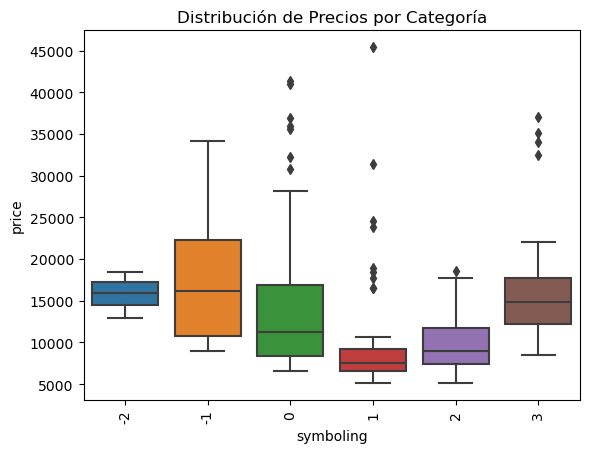

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes una variable categórica llamada 'categoria' en tu DataFrame
sns.boxplot(x='symboling', y='price', data=ordf)
plt.title('Distribución de Precios por Categoría')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [21]:
import pandas as pd
from scipy.stats import pointbiserialr

# Supongamos que tienes un DataFrame llamado 'data' con tus datos.
# Si no lo tienes, debes cargar tus datos en un DataFrame primero.

# Selecciona la variable categórica y la variable numérica
categoria = ordf['symboling']
price = ordf['price']

# Calcula el coeficiente de correlación punto-biserial
correlation, p_value = pointbiserialr(categoria, price)

# Imprime el coeficiente de correlación y el valor p
print(f"Coeficiente de Correlación Punto-Biserial: {correlation}")
print(f"Valor p: {p_value}")


Coeficiente de Correlación Punto-Biserial: -0.07997822464270349
Valor p: 0.25431175848635096


In [38]:
ordf.head(1)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0


In [51]:
#label encoding in odf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Categorical Data - Nominal (Label Encoding) do with all the categorical variables

label_encoder = LabelEncoder()
ordf['symboling'] = label_encoder.fit_transform(ordf['symboling'])
ordf['fueltype'] = label_encoder.fit_transform(ordf['fueltype'])
ordf['carbody'] = label_encoder.fit_transform(ordf['carbody'])
ordf['drivewheel'] = label_encoder.fit_transform(ordf['drivewheel'])
ordf['enginelocation'] = label_encoder.fit_transform(ordf['enginelocation'])
ordf['enginetype'] = label_encoder.fit_transform(ordf['enginetype'])
#ordf['cylindernumber'] = label_encoder.fit_transform(ordf['cylindernumber'])

In [40]:
ordf

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,alfa-romero giulia,1,0,2,0,88.6,168.8,64.1,48.8,...,0,2,130,2.68,9.0,111,5000,21,27,13495.0
1,5,alfa-romero stelvio,1,0,2,0,88.6,168.8,64.1,48.8,...,0,2,130,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,1,2,2,0,94.5,171.2,65.5,52.4,...,5,3,152,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,1,3,1,0,99.8,176.6,66.2,54.3,...,3,2,109,3.40,10.0,102,5500,24,30,13950.0
4,4,audi 100ls,1,3,0,0,99.4,176.6,66.4,54.3,...,3,1,136,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,volvo 145e (sw),1,3,2,0,109.1,188.8,68.9,55.5,...,3,2,141,3.15,9.5,114,5400,23,28,16845.0
201,1,volvo 144ea,1,3,2,0,109.1,188.8,68.8,55.5,...,3,2,141,3.15,8.7,160,5300,19,25,19045.0
202,1,volvo 244dl,1,3,2,0,109.1,188.8,68.9,55.5,...,5,3,173,2.87,8.8,134,5500,18,23,21485.0
203,1,volvo 246,0,3,2,0,109.1,188.8,68.9,55.5,...,3,3,145,3.40,23.0,106,4800,26,27,22470.0


In [52]:
import pandas as pd
from scipy.stats import f_oneway

# Supongamos que tienes un DataFrame llamado 'ordf' con tus datos.
# Asumiremos que 'ordf' contiene las columnas 'price' (variable numérica)
# y las variables categóricas en 'qualitative_vars'.

# Realizar el ANOVA para cada variable categórica
anova_results = []

for var in qualitative_vars:
    categories = ordf[var].unique()
    groups = [ordf[ordf[var] == category]['price'] for category in categories]
    f_statistic, p_value = f_oneway(*groups)
    anova_results.append((var, f_statistic, p_value))

# Imprimir los resultados del ANOVA
for var, f_statistic, p_value in anova_results:
    print(f"Variable Categórica: {var}")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("La diferencia entre al menos dos grupos es estadísticamente significativa.")
    else:
        print("No hay diferencias estadísticamente significativas entre los grupos.")
    print("=" * 50)


Variable Categórica: symboling
F-statistic: 6.252389586731183
P-value: 2.06898532790144e-05
La diferencia entre al menos dos grupos es estadísticamente significativa.
Variable Categórica: fueltype
F-statistic: 2.2927407366575174
P-value: 0.13153563336537924
No hay diferencias estadísticamente significativas entre los grupos.
Variable Categórica: carbody
F-statistic: 8.031976496876302
P-value: 5.031712258477608e-06
La diferencia entre al menos dos grupos es estadísticamente significativa.
Variable Categórica: drivewheel
F-statistic: 70.3205526496926
P-value: 6.632887281209634e-24
La diferencia entre al menos dos grupos es estadísticamente significativa.
Variable Categórica: enginelocation
F-statistic: 23.9697400547047
P-value: 1.993019639057392e-06
La diferencia entre al menos dos grupos es estadísticamente significativa.
Variable Categórica: enginetype
F-statistic: 9.376220306463633
P-value: 4.692664568743044e-09
La diferencia entre al menos dos grupos es estadísticamente significativa

Podemos ver que casi todas pasaron las prueba para ver si existe una diferencia sginificativa entre los diferentes grupos en el precio, por lo que podemos decir que estas variables son relevantes para el analisis y podemos incluirlas en el modelo, pero solo nos interesa agregar 1 que va a ser la que obtuvo el mayor F-score, que en este caso es la variable drivewheel y como cylinder number obtuvo un valor similar, también vamos a hacer una prueba co ambas y ver cual se desempeña mejor.

Luego de haber aplicado la transformacion a la variable cylindernumber podmeos ver que es la que mas alto F-score obtuvo, por lo que vamos a incluirla en el modelo.

Si el valor p es menor que tu nivel de significación elegido (por ejemplo, 0.05), puedes rechazar la hipótesis nula, lo que significa que existen diferencias estadísticamente significativas en las medias de la variable numérica (por ejemplo, "precio") entre las categorías de la variable categórica.


Si el valor p es mayor que tu nivel de significación elegido, no puedes rechazar la hipótesis nula, lo que indica que no hay diferencias estadísticamente significativas entre los grupos.

## Selección de nuestras 6 variables para el análisis de precio

Uno de los analisis mas fuertes que hice y que creo que es de los que tenemos que tomar mas en cuenta fue el de coeficiente de correlacion de pearson, es por eso que voy a seleccionar las 5 variables con mayor correlacion con la variable precio para hacer el analisis de regresion lineal e intentar agregar una 6ta categorica, que será ya sea drivewheel o cylindernumber, aunque despues de hacer la transformacion a cylinder number esto nos facilitó el incluirla en el modeloen vez de drivewheel. Entonces nuestras 6 variables seleccionadas son las siguientes:

- enginesize          
- curbweight          
- horsepower          
- carwidth           
- carlength           
- cylindernumber      

#### Creación de dataset de variables seleccionadas

In [54]:
df2 = ordf[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'cylindernumber', 'price']]

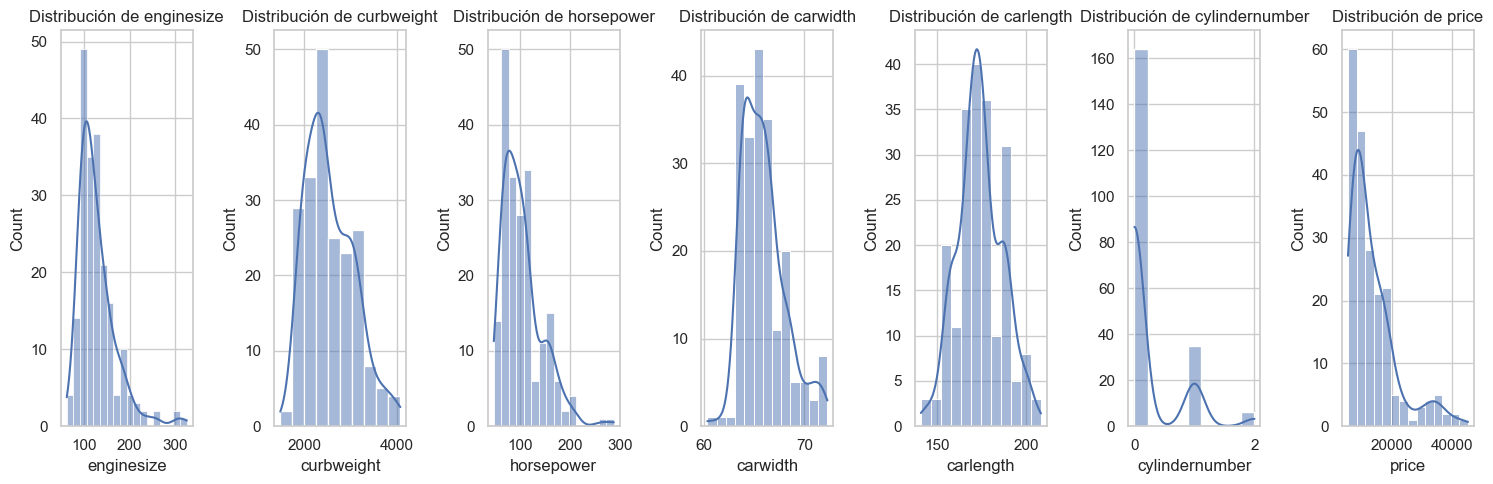

In [78]:
variables_a_visualizar = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'cylindernumber', 'price']
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=len(variables_a_visualizar), figsize=(15, 5))
for i, variable in enumerate(variables_a_visualizar):
    sns.histplot(df2[variable], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {variable}')
plt.tight_layout()
plt.show()

In [109]:
# Loop a través de las columnas del DataFrame

data = df2['price'].values  # Obtén los valores de la columna actual como un arreglo NumPy

# Realiza la prueba de Anderson-Darling
result = stats.anderson(data)

# Imprime el nombre de la columna y el resultado de la prueba
print(f'Columna: price')
print(f'Estadístico de Anderson-Darling: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')

# Compara el estadístico de prueba con los valores críticos para determinar la normalidad
for i, alpha in enumerate(result.significance_level):
    if result.statistic < result.critical_values[i]:
        print(f'Los datos son aproximadamente normales al nivel de significancia {alpha}%')
    else:
        print(f'Los datos no son normales al nivel de significancia {alpha}%')

print('-' * 40)  # Separador entre las pruebas de las columnas

Columna: price
Estadístico de Anderson-Darling: 12.340562863167577
Valores críticos: [0.565 0.644 0.772 0.901 1.072]
Los datos no son normales al nivel de significancia 15.0%
Los datos no son normales al nivel de significancia 10.0%
Los datos no son normales al nivel de significancia 5.0%
Los datos no son normales al nivel de significancia 2.5%
Los datos no son normales al nivel de significancia 1.0%
----------------------------------------


Como podemos ver los datos de la variable price no siguen una distribucion normal, que es uno de los supuestos de la regresion lineal, por lo que vamos a aplicar una transformacion logaritmica a los datos para ver si podemos normalizarlos y poder aplicar el modelo de regresion lineal.

In [64]:
df2.describe()

,enginesize,curbweight,horsepower,carwidth,carlength,cylindernumber,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.907317,2555.565854,104.117073,65.907805,174.049268,0.229268,13276.710571
std,41.642693,520.680204,39.544167,2.145204,12.337289,0.486204,7988.852332
min,61.000000,1488.000000,48.000000,60.300000,141.100000,0.000000,5118.000000
25%,97.000000,2145.000000,70.000000,64.100000,166.300000,0.000000,7788.000000
50%,120.000000,2414.000000,95.000000,65.500000,173.200000,0.000000,10295.000000
75%,141.000000,2935.000000,116.000000,66.900000,183.100000,0.000000,16503.000000
max,326.000000,4066.000000,288.000000,72.300000,208.100000,2.000000,45400.000000


In [123]:
# Columnas a transformar
columns_to_transform = ['price']

# Crear un nuevo DataFrame para almacenar los datos transformados
boxcoxdf = df2.copy()

boxcoxdf.drop(columns=['cylindernumber'], inplace=True)

# Iterar a través de las columnas y aplicar Box-Cox
for column in columns_to_transform:
    # Aplicar Box-Cox y obtener el valor óptimo de lambda
    transformed_data, lambda_value = stats.boxcox(df2[column])
    
    # Actualizar la columna en el DataFrame transformado
    boxcoxdf[column] = transformed_data

# Imprimir el nuevo DataFrame con datos transformados
boxcoxdf

,enginesize,curbweight,horsepower,carwidth,carlength,price
0,130,2548,111,64.1,168.8,1.588097
1,130,2548,111,64.1,168.8,1.588578
2,152,2823,154,65.5,171.2,1.588578
3,109,2337,102,66.2,176.6,1.588181
4,136,2824,115,66.4,176.6,1.588702
...,...,...,...,...,...,...
200,141,2952,114,68.9,188.8,1.588624
201,141,3049,160,68.8,188.8,1.588886
202,173,3012,134,68.9,188.8,1.589124
203,145,3217,106,68.9,188.8,1.589208


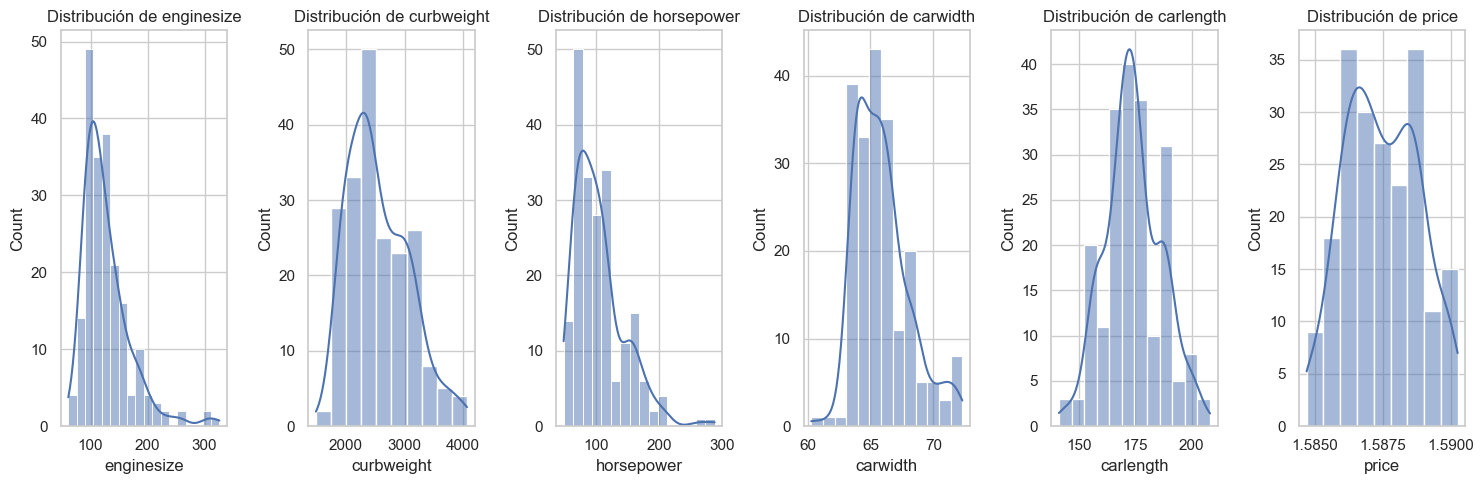

In [124]:
variables_a_visualizar = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'price']

# Configurar el estilo de las gráficas de seaborn (opcional)
sns.set(style="whitegrid")

# Crear subplots para visualizar múltiples gráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_a_visualizar), figsize=(15, 5))

# Generar gráficos de histograma o de densidad para cada variable
for i, variable in enumerate(variables_a_visualizar):
    sns.histplot(boxcoxdf[variable], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {variable}')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

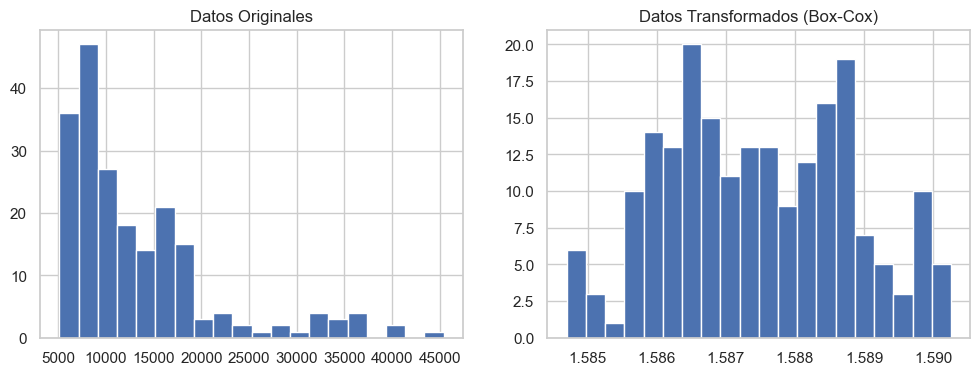

In [125]:
# Compara los datos originales y transformados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df2.price, bins=20)
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.hist(boxcoxdf.price, bins=20)
plt.title("Datos Transformados (Box-Cox)")

plt.show()

despues de aplicar la transformacion Box-Cox vamos a realiza de nuevo el test de anderson darling para ver si ahora los datos se aproximan a una distribución normal y podemos aplicar el modelo de regresion lineal.

In [126]:
# Loop a través de las columnas del DataFrame

data = boxcoxdf['price'].values  # Obtén los valores de la columna actual como un arreglo NumPy

# Realiza la prueba de Anderson-Darling
result = stats.anderson(data)

# Imprime el nombre de la columna y el resultado de la prueba
print(f'Columna: price')
print(f'Estadístico de Anderson-Darling: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')

# Compara el estadístico de prueba con los valores críticos para determinar la normalidad
for i, alpha in enumerate(result.significance_level):
    if result.statistic < result.critical_values[i]:
        print(f'Los datos son aproximadamente normales al nivel de significancia {alpha}%')
    else:
        print(f'Los datos no son normales al nivel de significancia {alpha}%')

print('-' * 40)  # Separador entre las pruebas de las columnas

Columna: price
Estadístico de Anderson-Darling: 1.239188771027301
Valores críticos: [0.565 0.644 0.772 0.901 1.072]
Los datos no son normales al nivel de significancia 15.0%
Los datos no son normales al nivel de significancia 10.0%
Los datos no son normales al nivel de significancia 5.0%
Los datos no son normales al nivel de significancia 2.5%
Los datos no son normales al nivel de significancia 1.0%
----------------------------------------


In [127]:
result.statistic

1.239188771027301

Como no funcionó la trnasformación BoxCox vamos a experimentar con otra tranformacion de los datos para ver si podemos normalizarlos y aplicar el modelo de regresion lineal. Esta será la transformación logaritmica

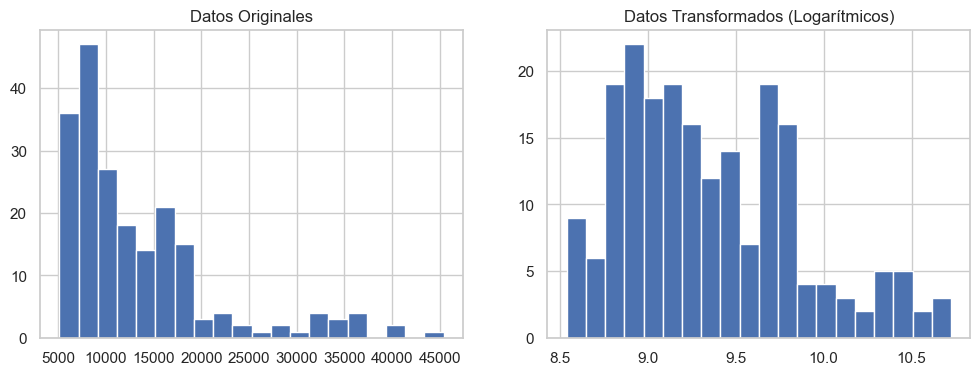

In [118]:
#aplicar tranformacion logaritmica a los datos

# Aplica la transformación logarítmica a los datos
transformed_data = df2.copy()

# Si estás trabajando con un DataFrame pandas, puedes hacerlo de la siguiente manera:
#transformed_data['cylindernumber'] = np.log(transformed_data['cylindernumber'])
transformed_data['price'] = np.log(transformed_data['price'])

transformed_data.drop(columns=['cylindernumber'], inplace=True)


# Imprime los datos originales y los datos transformados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df2.price, bins=20)
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.hist(transformed_data.price, bins=20)
plt.title("Datos Transformados (Logarítmicos)")

plt.show()

In [119]:
# Loop a través de las columnas del DataFrame

data = transformed_data['price'].values  # Obtén los valores de la columna actual como un arreglo NumPy

# Realiza la prueba de Anderson-Darling
result = stats.anderson(data)

# Imprime el nombre de la columna y el resultado de la prueba
print(f'Columna: price')
print(f'Estadístico de Anderson-Darling: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')

# Compara el estadístico de prueba con los valores críticos para determinar la normalidad
for i, alpha in enumerate(result.significance_level):
    if result.statistic < result.critical_values[i]:
        print(f'Los datos son aproximadamente normales al nivel de significancia {alpha}%')
    else:
        print(f'Los datos no son normales al nivel de significancia {alpha}%')

print('-' * 40)  # Separador entre las pruebas de las columnas

Columna: price
Estadístico de Anderson-Darling: 3.017292800703359
Valores críticos: [0.565 0.644 0.772 0.901 1.072]
Los datos no son normales al nivel de significancia 15.0%
Los datos no son normales al nivel de significancia 10.0%
Los datos no son normales al nivel de significancia 5.0%
Los datos no son normales al nivel de significancia 2.5%
Los datos no son normales al nivel de significancia 1.0%
----------------------------------------


Ademas de la prueba de anderson Darling vamos a ver el sesgo y kurtosis de la variable para verificar la normalidad de los datos.

In [120]:
# Calcular el sesgo y la kurtosis para cada variable
skewness = df2.skew()  # Sesgo
kurt = df2.kurtosis()  # Kurtosis

# Crear un DataFrame para mostrar los resultados
stats_df = pd.DataFrame({'Sesgo (Skewness)': skewness, 'Kurtosis': kurt})

# Imprimir los resultados
print("Análisis de Sesgo y Kurtosis:")
print(stats_df)

Análisis de Sesgo y Kurtosis:
                Sesgo (Skewness)  Kurtosis
enginesize              1.947655  5.305682
curbweight              0.681398 -0.042854
horsepower              1.405310  2.684006
carwidth                0.904003  0.702764
carlength               0.155954 -0.082895
cylindernumber          2.039808  3.440857
price                   1.777678  3.051648


In [128]:
# Calcular el sesgo y la kurtosis para cada variable
skewness = boxcoxdf.skew()  # Sesgo
kurt = boxcoxdf.kurtosis()  # Kurtosis

# Crear un DataFrame para mostrar los resultados
stats_df = pd.DataFrame({'Sesgo (Skewness)': skewness, 'Kurtosis': kurt})

# Imprimir los resultados
print("Análisis de Sesgo y Kurtosis:")
print(stats_df)

Análisis de Sesgo y Kurtosis:
            Sesgo (Skewness)  Kurtosis
enginesize          1.947655  5.305682
curbweight          0.681398 -0.042854
horsepower          1.405310  2.684006
carwidth            0.904003  0.702764
carlength           0.155954 -0.082895
price               0.094154 -0.822799


Despues de hacer las pruebas vemos que las varibales que mejor se comportan son las de boxcox, por lo que vamos a usar estas para el modelo de regresion lineal y el ANOVA.

Ademas en el analisis del sesgo y de kurtosis podemos ver que las variables que mejor se comportan son las de boxcox ya que son las que mas se asimilan a la normal, asi que vamos a asumir que estas  se comportan como una distribucion normal al haber obtenido una disminucion en la variable objetivo price de  1.777678 a 0.094154 y tambien en curtosis de 3.051648 a -0.822799, entonces podemos notar que ahora la variable practicamente no tiene sesgo o tiene un sesgo muy pequeño a la derecha y la curtosis se acerca a 0, por lo que podemos decir que la variable se comporta como una distribucion normal.

#### Revisa si es necesario escalar y normalizar los datos

Es necesario hacer esto debido a que el modelo de regresion lineal es sensible a la escala por lo que vamos a escalar los datos para que el modelo no se vea afectado por esto.

In [84]:
df2

,enginesize,curbweight,horsepower,carwidth,carlength,cylindernumber,price
0,130,2548,111,64.1,168.8,0,13495.0
1,130,2548,111,64.1,168.8,0,16500.0
2,152,2823,154,65.5,171.2,1,16500.0
3,109,2337,102,66.2,176.6,0,13950.0
4,136,2824,115,66.4,176.6,1,17450.0
...,...,...,...,...,...,...,...
200,141,2952,114,68.9,188.8,0,16845.0
201,141,3049,160,68.8,188.8,0,19045.0
202,173,3012,134,68.9,188.8,1,21485.0
203,145,3217,106,68.9,188.8,1,22470.0


In [130]:
columns_to_normalize = ['enginesize',	'curbweight',	'horsepower',	'carwidth',	'carlength'	]

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplica la transformación de Min-Max Scaling solo a las columnas seleccionadas
boxcoxdf[columns_to_normalize] = scaler.fit_transform(boxcoxdf[columns_to_normalize])

boxcoxdf['cylindernumber'] = df2['cylindernumber']

boxcoxdf.head()

,enginesize,curbweight,horsepower,carwidth,carlength,price,cylindernumber
0,0.260377,0.411171,0.262500,0.316667,0.413433,1.588097,0
1,0.260377,0.411171,0.262500,0.316667,0.413433,1.588578,0
2,0.343396,0.517843,0.441667,0.433333,0.449254,1.588578,1
3,0.181132,0.329325,0.225000,0.491667,0.529851,1.588181,0
4,0.283019,0.518231,0.279167,0.508333,0.529851,1.588702,1


In [131]:
boxcoxdf.describe()

,enginesize,curbweight,horsepower,carwidth,carlength,price,cylindernumber
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.248707,0.414106,0.233821,0.467317,0.491780,1.587470,0.229268
std,0.157142,0.201971,0.164767,0.178767,0.184139,0.001344,0.486204
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.584698,0.000000
25%,0.135849,0.254849,0.091667,0.316667,0.376119,1.586425,0.000000
50%,0.222642,0.359193,0.195833,0.433333,0.479104,1.587346,0.000000
75%,0.301887,0.561288,0.283333,0.550000,0.626866,1.588579,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.590259,2.000000


Con el propósito de evaluar las influencias de diversas variables en el precio de un vehículo automotor, se llevará a cabo un análisis compuesto por dos componentes distintos: una regresión lineal múltiple y un análisis de varianza (ANOVA). Este enfoque metodológico nos permitirá identificar de manera más precisa y detallada cómo las variables, tanto numéricas como categóricas, inciden en el precio del automóvil.

En el contexto de la regresión lineal múltiple, se aplicará un modelo estadístico que considera múltiples variables independientes y su relación con la variable dependiente, en este caso, el precio del automóvil. Este método nos proporcionará una comprensión más completa de cómo las diversas características del vehículo y otros factores pueden influir de manera conjunta en su valor monetario.

Por otro lado, el análisis de varianza (ANOVA) se utilizará para examinar cómo las variables categóricas, como el numero de cilindros, influyen en el precio del automóvil. El ANOVA nos permitirá determinar si existen diferencias significativas entre las categorías de estas variables y cómo estas diferencias se traducen en variaciones en los precios. Ademas de usar la variable categorica seleccionada significativa para el analisis de regresion lineal multiple.

### ANOVA

In [132]:
#convertimos las variables categoricas a ndummy
Dtransformed_df = pd.get_dummies(boxcoxdf, columns=['cylindernumber'],  drop_first=True)


In [133]:
Dtransformed_df

,enginesize,curbweight,horsepower,carwidth,carlength,price,cylindernumber_1,cylindernumber_2
0,0.260377,0.411171,0.262500,0.316667,0.413433,1.588097,0,0
1,0.260377,0.411171,0.262500,0.316667,0.413433,1.588578,0,0
2,0.343396,0.517843,0.441667,0.433333,0.449254,1.588578,1,0
3,0.181132,0.329325,0.225000,0.491667,0.529851,1.588181,0,0
4,0.283019,0.518231,0.279167,0.508333,0.529851,1.588702,1,0
...,...,...,...,...,...,...,...,...
200,0.301887,0.567882,0.275000,0.716667,0.711940,1.588624,0,0
201,0.301887,0.605508,0.466667,0.708333,0.711940,1.588886,0,0
202,0.422642,0.591156,0.358333,0.716667,0.711940,1.589124,1,0
203,0.316981,0.670675,0.241667,0.716667,0.711940,1.589208,1,0


In [134]:
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova


# Realizar ANOVA para evaluar la influencia de las variables categóricas
formula = 'price ~ cylindernumber_1	+ cylindernumber_2'
anova_results = anova.anova_lm(ols(formula, Dtransformed_df).fit())

print(anova_results)

                     df    sum_sq   mean_sq           F        PR(>F)
cylindernumber_1    1.0  0.000110  0.000110  106.913414  2.198720e-20
cylindernumber_2    1.0  0.000051  0.000051   49.172882  3.449400e-11
Residual          202.0  0.000208  0.000001         NaN           NaN


*Hipótesis Nula (H0):* La hipótesis nula establece que no hay diferencias significativas entre los grupos formados por las variables categóricas. En el contexto del código proporcionado, la H0 sería:

"No hay diferencias significativas en la variable 'price' entre los grupos formados por las categorías de las variables categóricas ('cylindernumber_1'	+ 'cylindernumber_2')."

En otras palabras, si la H0 es cierta, significa que las variables categóricas no tienen un efecto significativo en la variable de respuesta 'price'.

*Hipótesis Alternativa (H1):* La hipótesis alternativa es el complemento de la hipótesis nula. En el contexto del código proporcionado, la H1 sería:

"Existen diferencias significativas en la variable 'price' entre al menos dos de los grupos formados por las categorías de las variables categóricas ('fourwd', 'fwd', 'rwd', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon')."

Como el p-value en ambas variables << 0.05, podemos rechazar la hipótesis nula y concluir que existen diferencias significativas en la variable 'price' entre al menos dos de los grupos formados por las categorías de las variables categóricas ('cylindernumber_1'	+ 'cylindernumber_2').

Y combinado con que el estadistico F tiene un valor bastante alto, entonces podemos decir que esta tiene un efecto bastante alto en el precio de los carros y mererce la pena incluirla en nuestro modelo de la regesion lineal multiple, lo que tambien confrima el analisis preliminar que hicimos al inicio del analisis.

In [135]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tu DataFrame se llama 'boxcoxdf'
# Calcular las medias por 'cylindernumber' usando pandas
means_by_cylindernumber = boxcoxdf.groupby('cylindernumber')['price'].mean().reset_index()

# Renombrar las columnas para mayor claridad
means_by_cylindernumber.columns = ['cylindernumber', 'Mean_Price']

# Mostrar los resultados
print(means_by_cylindernumber)

# Realizar el análisis de varianza (ANOVA)
model = ols('price ~ C(cylindernumber)', data=boxcoxdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar la tabla ANOVA
print(anova_table)

# Realizar la prueba de Tukey para identificar diferencias significativas
tukey_results = pairwise_tukeyhsd(boxcoxdf['price'], boxcoxdf['cylindernumber'], alpha=0.05)

# Mostrar los resultados de la prueba de Tukey
print(tukey_results)


   cylindernumber  Mean_Price
0               0    1.587033
1               1    1.589084
2               2    1.589989
                     sum_sq     df          F        PR(>F)
C(cylindernumber)  0.000161    2.0  78.043148  7.722013e-26
Residual           0.000208  202.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0021   0.0  0.0016 0.0025   True
     0      2    0.003   0.0   0.002  0.004   True
     1      2   0.0009  0.11 -0.0002  0.002  False
--------------------------------------------------


*sum_sq:* La suma de cuadrados explicada por el factor "cylindernumber" y el término residual.
*df:* Grados de libertad, que indican cuántos grupos y cuántos datos en total se utilizaron para el cálculo.
*F:* La estadística de prueba F, que compara la varianza entre grupos con la varianza dentro de grupos.
*PR(>F):* El valor p asociado a la estadística de prueba F. En este caso, es extremadamente pequeño (casi cero), lo que sugiere que al menos un grupo tiene un efecto significativo en la variable "price".

*group1 y group2:* Los grupos comparados entre sí.
*meandiff:* La diferencia promedio entre las medias de los grupos comparados.
*p-adj:* El valor p ajustado después de la corrección de Bonferroni.
*lower y upper:* Los límites inferior y superior del intervalo de confianza para la diferencia de medias.
*reject:* Indica si se rechaza la hipótesis nula (True) o no (False) para la comparación de grupos correspondiente.

En este caso, las comparaciones entre los grupos 0 y 1, y entre los grupos 0 y 2, muestran diferencias significativas (reject=True) porque los valores p son muy pequeños (casi cero). Sin embargo, la comparación entre los grupos 1 y 2 no muestra una diferencia significativa (reject=False) porque el valor p es mayor (0.11), lo que sugiere que no hay suficiente evidencia para afirmar que hay una diferencia significativa entre esos dos grupos en términos de precio.

A lo que le atribuyo esta falta de sgnificancia en el precio es a la cantidad de datos en cada categoria, en nuestra variable de >=8 cilindros solamente contamos con 2 observaciones, por lo que no es suficiente para poder hacer un analisis estadistico confiable. Entonces tomando en cuenta esto vamos a volver a transformar a nuestros datos para convertirlos en una variable binaria

In [136]:
# replace the values in the column 'cylindernumber' using the dictionary

# Crear un diccionario de mapeo para los valores de reemplazo
cylinder_mapping = {
    0: 0,
    1: 1,
    2: 1,}

df3 = boxcoxdf.copy()

# Reemplazar los valores en la columna 'cylinder_number' usando el diccionario
df3['cylindernumber'] = df3['cylindernumber'].replace(cylinder_mapping)

In [106]:
df3.cylindernumber.value_counts()

0    164
1     41
Name: cylindernumber, dtype: int64

In [137]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tu DataFrame se llama 'df3'
# Calcular las medias por 'cylindernumber' usando pandas
means_by_cylindernumber = df3.groupby('cylindernumber')['price'].mean().reset_index()

# Renombrar las columnas para mayor claridad
means_by_cylindernumber.columns = ['cylindernumber', 'Mean_Price']

# Mostrar los resultados
print(means_by_cylindernumber)

# Realizar el análisis de varianza (ANOVA)
model = ols('price ~ C(cylindernumber)', data=df3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar la tabla ANOVA
print(anova_table)

# Realizar la prueba de Tukey para identificar diferencias significativas
tukey_results = pairwise_tukeyhsd(df3['price'], df3['cylindernumber'], alpha=0.05)

# Mostrar los resultados de la prueba de Tukey
print(tukey_results)


   cylindernumber  Mean_Price
0               0    1.587033
1               1    1.589217
                     sum_sq     df           F        PR(>F)
C(cylindernumber)  0.000156    1.0  149.733996  3.765642e-26
Residual           0.000212  203.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.0022   0.0 0.0018 0.0025   True
-------------------------------------------------


La prueba de Tukey muestra una diferencia significativa entre los grupos 0 y 1 (reject=True), lo que significa que la combinación de las categorías 1 y 2 tiene un efecto significativo en el precio en comparación con el grupo 0.

En resumen, aunque haya combinado las categorías 1 y 2, todavía se observa un efecto significativo del factor "cylindernumber" en la variable "price", y la prueba de Tukey confirma que existe una diferencia significativa entre estos grupos combinados y el grupo 0 en términos de precio. Recordemos que a pesar de que las diferencias se vean pequeña se debe principalmente a que los datos fueron transformados con boxcox

#### Análisis de regresión lineal sobre dataframe final


In [138]:
X = df3.drop(columns=['price'])
y = df3['price']

In [139]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# X es tu matriz de características y y es tu vector de etiquetas
model = LinearRegression()
selector = RFECV(model, cv=5)  # 5-fold cross-validation
selector.fit(X, y)

# Las variables seleccionadas están en selector.support_


RFECV(cv=5, estimator=LinearRegression())

In [140]:
selector.support_

array([False,  True,  True, False, False, False])

In [152]:
X.columns

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'cylindernumber'],
      dtype='object')

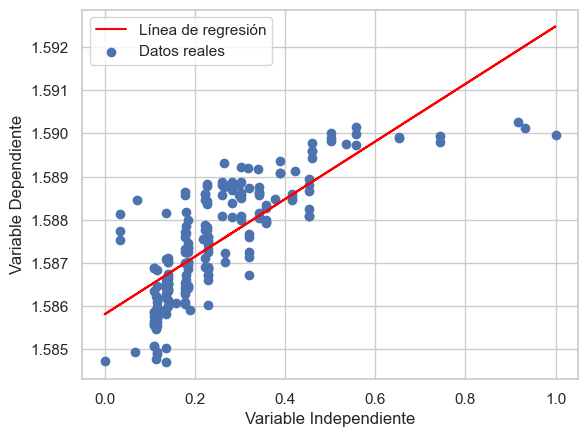

Coeficiente (pendiente): 0.006668478938585728
Intercepto: 1.585811419037149
Coeficiente (pendiente): 0.006668478938585728
Intercepto: 1.585811419037149
Coeficiente de determinación (R-squared): 0.6081602658491732
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     315.1
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           3.59e-43
Time:                        21:52:15   Log-Likelihood:                 1161.2
No. Observations:                 205   AIC:                            -2318.
Df Residuals:                     203   BIC:                            -2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                       

In [156]:
# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(np.array(X['enginesize']).reshape(-1, 1), y)

# Realiza predicciones
predicciones = modelo.predict(np.array(X['enginesize']).reshape(-1, 1))

# Grafica los datos y la línea de regresión
plt.scatter(X['enginesize'], y, label='Datos reales')
plt.plot(X['enginesize'], predicciones, color='red', label='Línea de regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

# Imprime los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

# Access the model coefficients and intercept
coef = modelo.coef_[0]
intercept = modelo.intercept_

# Print the coefficients and intercept
print('Coeficiente (pendiente):', coef)
print('Intercepto:', intercept)

# Calculate R-squared (coefficient of determination)
r_squared = modelo.score(np.array(X['enginesize']).reshape(-1, 1), y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Alternatively, you can use statsmodels for more detailed summary
import statsmodels.api as sm

# Add a constant (intercept) term to the input np.array(X['enginesize'])
X_with_intercept = sm.add_constant(np.array(X['enginesize']).reshape(-1, 1))

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())


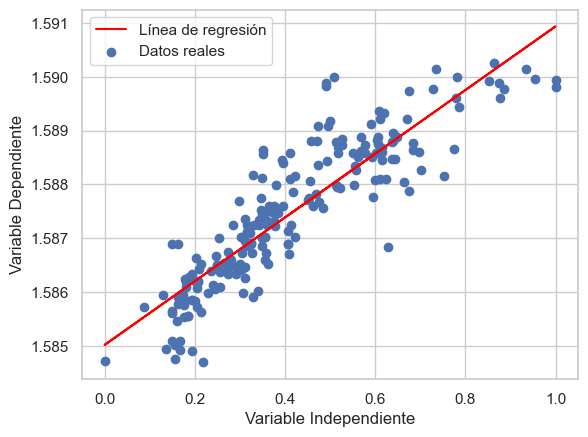

Coeficiente (pendiente): 0.005910394534923752
Intercepto: 1.5850223842921582
Coeficiente (pendiente): 0.005910394534923752
Intercepto: 1.5850223842921582
Coeficiente de determinación (R-squared): 0.7892014033656246
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     760.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.48e-70
Time:                        21:52:40   Log-Likelihood:                 1224.7
No. Observations:                 205   AIC:                            -2445.
Df Residuals:                     203   BIC:                            -2439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                     

In [157]:
# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(np.array(X['curbweight']).reshape(-1, 1), y)

# Realiza predicciones
predicciones = modelo.predict(np.array(X['curbweight']).reshape(-1, 1))

# Grafica los datos y la línea de regresión
plt.scatter(X['curbweight'], y, label='Datos reales')
plt.plot(X['curbweight'], predicciones, color='red', label='Línea de regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

# Imprime los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

# Access the model coefficients and intercept
coef = modelo.coef_[0]
intercept = modelo.intercept_

# Print the coefficients and intercept
print('Coeficiente (pendiente):', coef)
print('Intercepto:', intercept)

# Calculate R-squared (coefficient of determination)
r_squared = modelo.score(np.array(X['curbweight']).reshape(-1, 1), y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Alternatively, you can use statsmodels for more detailed summary
import statsmodels.api as sm

# Add a constant (intercept) term to the input np.array(X['curbweight'])
X_with_intercept = sm.add_constant(np.array(X['curbweight']).reshape(-1, 1))

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())

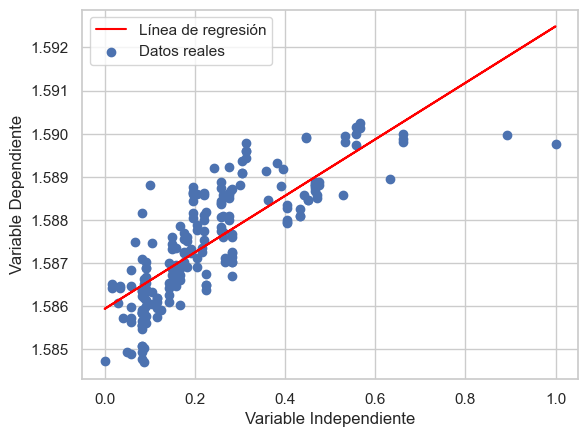

Coeficiente (pendiente): 0.006549893840510427
Intercepto: 1.5859384118411826
Coeficiente (pendiente): 0.006549893840510427
Intercepto: 1.5859384118411826
Coeficiente de determinación (R-squared): 0.645044232279929
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     368.9
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.53e-47
Time:                        21:53:18   Log-Likelihood:                 1171.3
No. Observations:                 205   AIC:                            -2339.
Df Residuals:                     203   BIC:                            -2332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                      

In [159]:
# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(np.array(X['horsepower']).reshape(-1, 1), y)

# Realiza predicciones
predicciones = modelo.predict(np.array(X['horsepower']).reshape(-1, 1))

# Grafica los datos y la línea de regresión
plt.scatter(X['horsepower'], y, label='Datos reales')
plt.plot(X['horsepower'], predicciones, color='red', label='Línea de regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

# Imprime los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

# Access the model coefficients and intercept
coef = modelo.coef_[0]
intercept = modelo.intercept_

# Print the coefficients and intercept
print('Coeficiente (pendiente):', coef)
print('Intercepto:', intercept)

# Calculate R-squared (coefficient of determination)
r_squared = modelo.score(np.array(X['horsepower']).reshape(-1, 1), y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Alternatively, you can use statsmodels for more detailed summary
import statsmodels.api as sm

# Add a constant (intercept) term to the input np.array(X['horsepower'])
X_with_intercept = sm.add_constant(np.array(X['horsepower']).reshape(-1, 1))

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())

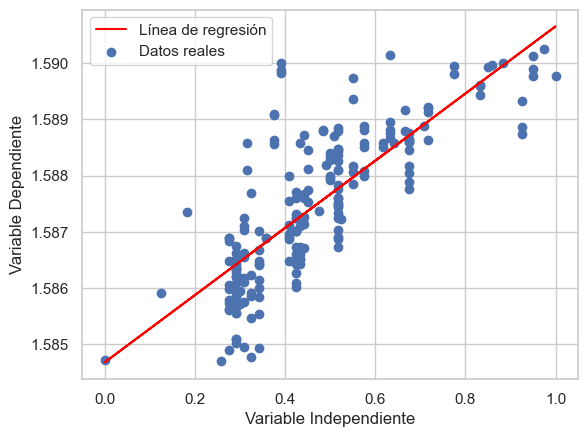

Coeficiente (pendiente): 0.0059766639358777955
Intercepto: 1.584676918376295
Coeficiente (pendiente): 0.0059766639358777955
Intercepto: 1.584676918376295
Coeficiente de determinación (R-squared): 0.6322239093942161
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     349.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.66e-46
Time:                        21:53:54   Log-Likelihood:                 1167.7
No. Observations:                 205   AIC:                            -2331.
Df Residuals:                     203   BIC:                            -2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                     

In [161]:
# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(np.array(X['carwidth']).reshape(-1, 1), y)

# Realiza predicciones
predicciones = modelo.predict(np.array(X['carwidth']).reshape(-1, 1))

# Grafica los datos y la línea de regresión
plt.scatter(X['carwidth'], y, label='Datos reales')
plt.plot(X['carwidth'], predicciones, color='red', label='Línea de regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

# Imprime los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

# Access the model coefficients and intercept
coef = modelo.coef_[0]
intercept = modelo.intercept_

# Print the coefficients and intercept
print('Coeficiente (pendiente):', coef)
print('Intercepto:', intercept)

# Calculate R-squared (coefficient of determination)
r_squared = modelo.score(np.array(X['carwidth']).reshape(-1, 1), y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Alternatively, you can use statsmodels for more detailed summary
import statsmodels.api as sm

# Add a constant (intercept) term to the input np.array(X['carwidth'])
X_with_intercept = sm.add_constant(np.array(X['carwidth']).reshape(-1, 1))

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())


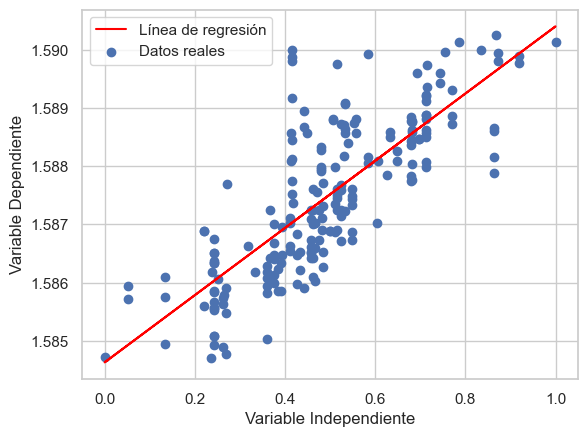

Coeficiente (pendiente): 0.00577587092448545
Intercepto: 1.5846294569560035
Coeficiente (pendiente): 0.00577587092448545
Intercepto: 1.5846294569560035
Coeficiente de determinación (R-squared): 0.6264744953224717
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     340.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.74e-45
Time:                        21:53:43   Log-Likelihood:                 1166.1
No. Observations:                 205   AIC:                            -2328.
Df Residuals:                     203   BIC:                            -2322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                       

In [160]:
# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(np.array(X['carlength']).reshape(-1, 1), y)

# Realiza predicciones
predicciones = modelo.predict(np.array(X['carlength']).reshape(-1, 1))

# Grafica los datos y la línea de regresión
plt.scatter(X['carlength'], y, label='Datos reales')
plt.plot(X['carlength'], predicciones, color='red', label='Línea de regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

# Imprime los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

# Access the model coefficients and intercept
coef = modelo.coef_[0]
intercept = modelo.intercept_

# Print the coefficients and intercept
print('Coeficiente (pendiente):', coef)
print('Intercepto:', intercept)

# Calculate R-squared (coefficient of determination)
r_squared = modelo.score(np.array(X['carlength']).reshape(-1, 1), y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Alternatively, you can use statsmodels for more detailed summary
import statsmodels.api as sm

# Add a constant (intercept) term to the input np.array(X['carlength'])
X_with_intercept = sm.add_constant(np.array(X['carlength']).reshape(-1, 1))

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())


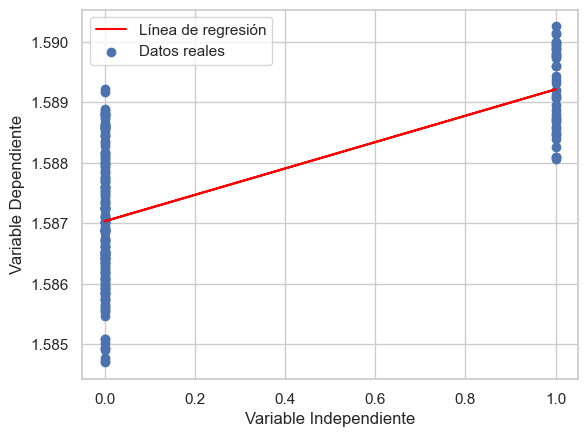

Coeficiente (pendiente): 0.0021833603089345915
Intercepto: 1.5870332434123475
Coeficiente de determinación (R-squared): 0.42449550619179577
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           3.77e-26
Time:                        21:56:37   Log-Likelihood:                 1121.8
No. Observations:                 205   AIC:                            -2240.
Df Residuals:                     203   BIC:                            -2233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [163]:
# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(np.array(X['cylindernumber']).reshape(-1, 1), y)

# Realiza predicciones
predicciones = modelo.predict(np.array(X['cylindernumber']).reshape(-1, 1))

# Grafica los datos y la línea de regresión
plt.scatter(X['cylindernumber'], y, label='Datos reales')
plt.plot(X['cylindernumber'], predicciones, color='red', label='Línea de regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

# Imprime los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)


# Calculate R-squared (coefficient of determination)
r_squared = modelo.score(np.array(X['cylindernumber']).reshape(-1, 1), y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Alternatively, you can use statsmodels for more detailed summary
import statsmodels.api as sm

# Add a constant (intercept) term to the input np.array(X['cylindernumber'])
X_with_intercept = sm.add_constant(np.array(X['cylindernumber']).reshape(-1, 1))

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())


Despues de haber hecho una regresion por cada variable en separado y ver que todas resultaron significativas vamos a hacer ahora la regesion lineal multiple con todas las variables y ver como se comportan.

Coeficientes:
const: 0.0
enginesize: -0.0015083624771639159
curbweight: 0.0031103140021874935
horsepower: 0.003161012736750484
carwidth: 0.0002683156401662648
carlength: 0.001532176864103656
cylindernumber: 0.00033876707512296494
Intercepto: 1.584871307549539
Coeficiente de determinación (R-squared): 0.8494864996617257


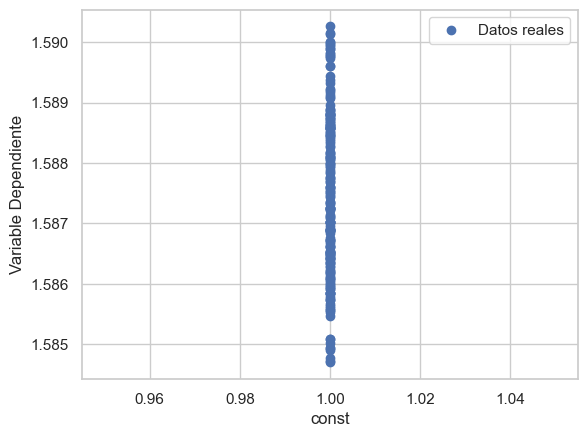

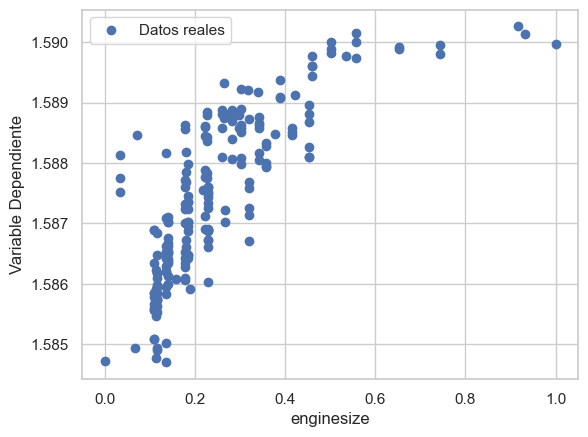

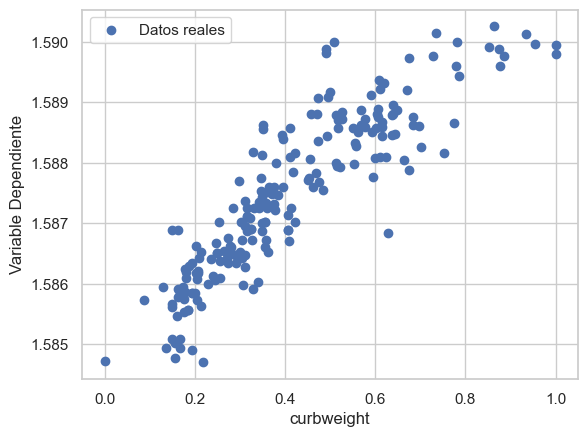

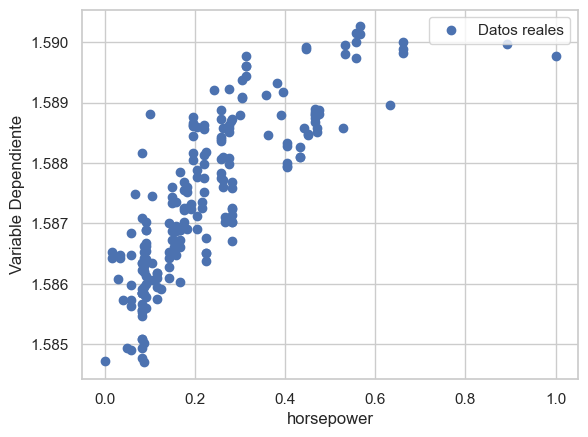

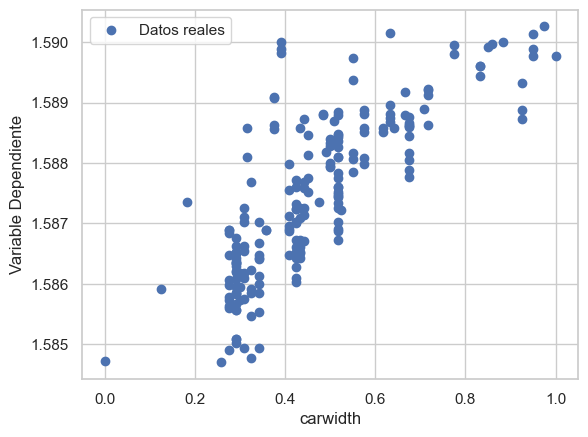

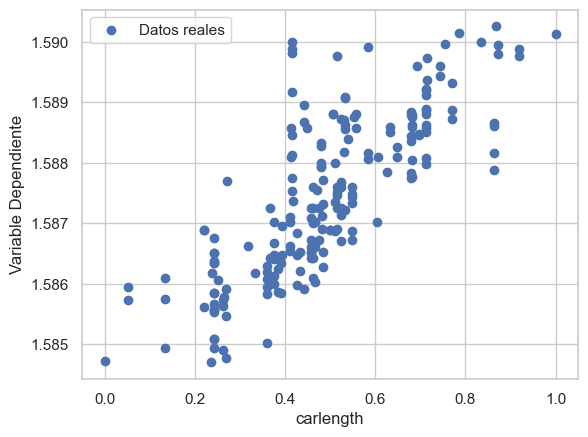

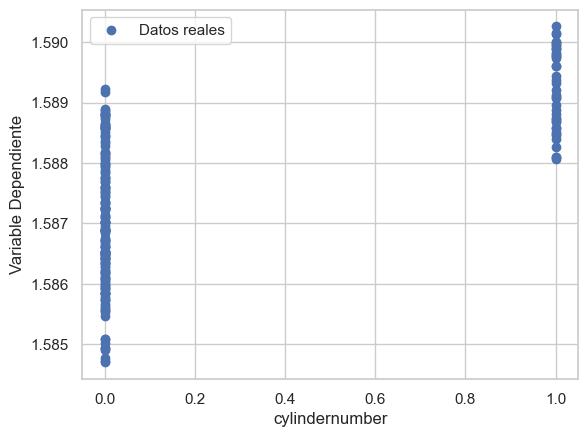

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.39e-78
Time:                        22:14:47   Log-Likelihood:                 1259.2
No. Observations:                 205   AIC:                            -2504.
Df Residuals:                     198   BIC:                            -2481.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5849      0.000   1.29e

In [171]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a todos los datos
modelo.fit(X, y)  # X debe ser un DataFrame que contiene todas tus variables independientes

# Realizar predicciones
predicciones = modelo.predict(X)

# Imprimir los coeficientes del modelo
print('Coeficientes:')
for i, variable in enumerate(X.columns):
    print(f'{variable}: {modelo.coef_[i]}')
print('Intercepto:', modelo.intercept_)

# Calcular R-squared (coefficient of determination)
r_squared = modelo.score(X, y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Graficar los datos y la línea de regresión (solo para una variable independiente a la vez)
for variable in X.columns:
    plt.scatter(X[variable], y, label='Datos reales')
    plt.xlabel(variable)
    plt.ylabel('Variable Dependiente')
    plt.legend()
    plt.show()

# Alternatively, you can use statsmodels for a more detailed summary
# Add a constant (intercept) term to the input X
X_with_intercept = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())

Como podemos ver en el modelo todas salieron significativas a excepcio de 1, que es carwidth y que tiene un valor p de 0.06, por lo que podemos decir que es una variable que no es significativa para el modelo y que podemos descartarla. Vamos a ver como se ve sin la variable 

Coeficientes:
const: 0.0
enginesize: -0.0015105638831834456
curbweight: 0.003212953933894975
horsepower: 0.0031702868932242793
carlength: 0.0016368359190634825
cylindernumber: 0.00035080890457855315
Intercepto: 1.5848986935963667
Coeficiente de determinación (R-squared): 0.849214312805592


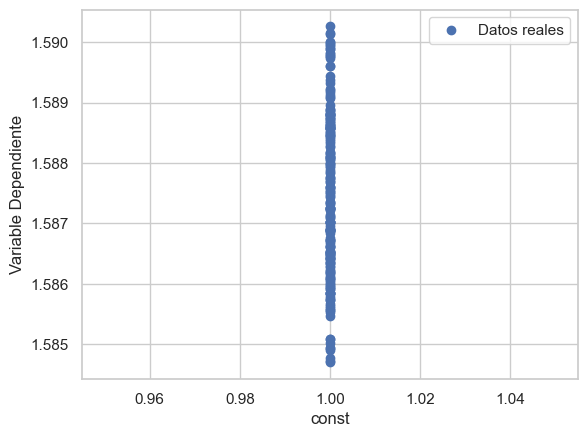

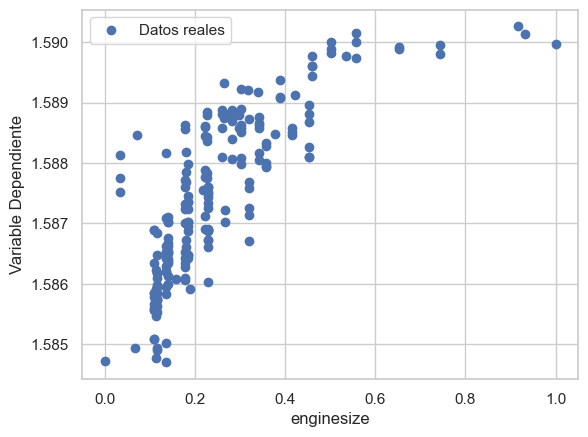

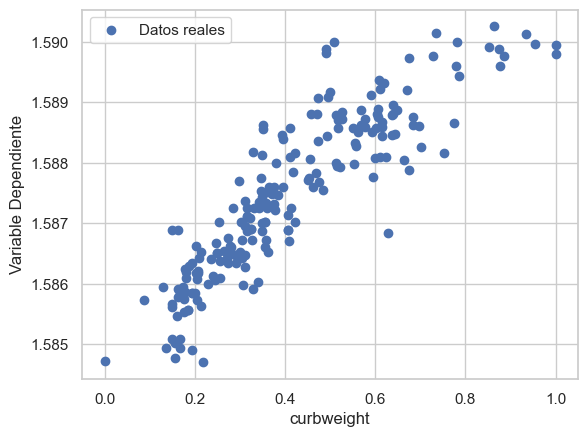

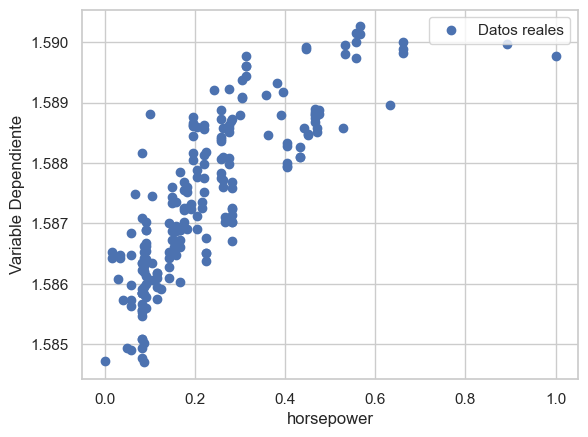

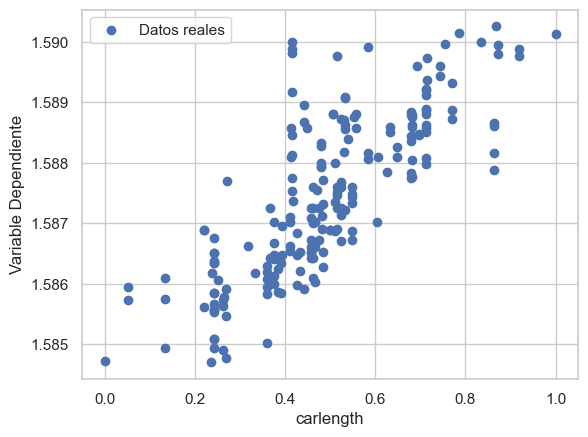

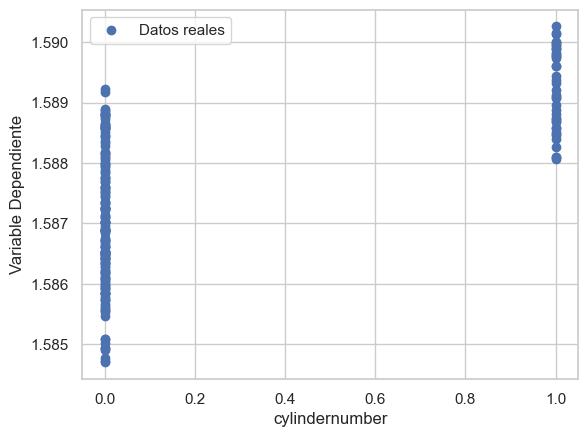

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     224.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.05e-79
Time:                        22:17:19   Log-Likelihood:                 1259.1
No. Observations:                 205   AIC:                            -2506.
Df Residuals:                     199   BIC:                            -2486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5849      0.000   1.39e

In [173]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

X2 = X.drop(columns=['carwidth'])

# Ajustar el modelo a todos los datos
modelo.fit(X2, y)  # X2 debe ser un DataFrame que contiene todas tus variables independientes

# Realizar predicciones
predicciones = modelo.predict(X2)

# Imprimir los coeficientes del modelo
print('Coeficientes:')
for i, variable in enumerate(X2.columns):
    print(f'{variable}: {modelo.coef_[i]}')
print('Intercepto:', modelo.intercept_)

# Calcular R-squared (coefficient of determination)
r_squared = modelo.score(X2, y)
print('Coeficiente de determinación (R-squared):', r_squared)

# Graficar los datos y la línea de regresión (solo para una variable independiente a la vez)
for variable in X2.columns:
    plt.scatter(X2[variable], y, label='Datos reales')
    plt.xlabel(variable)
    plt.ylabel('Variable Dependiente')
    plt.legend()
    plt.show()

# Alternatively, you can use statsmodels for a more detailed summary
# Add a constant (intercept) term to the input X2
X_with_intercept = sm.add_constant(X2)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS model
print(model.summary())

Vemos que ahora todas las variables son significativas y que el modelo tiene un R2 de 0.845, lo que quiere decir que el modelo explica el 84.5% de la variabilidad de los datos, lo cual es bastante bueno. Ademas usando el criterio de AIC podemos ver que el modelo es el que menor coeficiente tiene por lo que es el mejor modelo para predecir el precio de los carros de los que consideramos.

R-cuadrado (R-squared): R-squared es una medida de la bondad de ajuste del modelo. En este caso, R-squared es 0.849, lo que significa que el modelo explica aproximadamente el 84.9% de la variabilidad en la variable dependiente (price). Esto sugiere que el modelo tiene un buen ajuste a los datos, ya que un R-squared más cercano a 1 indica un mejor ajuste.

Adj. R-squared (R-cuadrado ajustado): El R-cuadrado ajustado tiene en cuenta el número de variables independientes en el modelo. En este caso, el R-cuadrado ajustado es 0.845, que es ligeramente menor que el R-squared, lo que sugiere que algunas de las variables independientes pueden no estar contribuyendo significativamente a la explicación de la variabilidad en la variable dependiente.

Coeficientes: Los coeficientes en la tabla representan la pendiente de cada variable independiente en el modelo. Por ejemplo, el coeficiente para enginesize es -0.0015, lo que significa que, manteniendo todas las demás variables constantes, un aumento de una unidad en enginesize se asocia con una disminución de 0.0015 unidades en la variable dependiente (price). Los coeficientes positivos indican una relación positiva con la variable dependiente, mientras que los coeficientes negativos indican una relación negativa.

P-valor (P>|t|): Los p-valores proporcionan información sobre la significancia estadística de cada coeficiente. Un p-valor pequeño (generalmente < 0.05) sugiere que el coeficiente es estadísticamente significativo. En este caso, todos los coeficientes tienen p-valores pequeños, lo que sugiere que todas las variables independientes son estadísticamente significativas en la predicción de la variable dependiente.

Estadísticas Omnibus, Durbin-Watson, Jarque-Bera, Skew y Kurtosis: Estas estadísticas proporcionan información adicional sobre la distribución de los residuos y otros aspectos del modelo. Por ejemplo, el valor de Durbin-Watson se utiliza para detectar la autocorrelación en los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación. Las otras estadísticas se utilizan para evaluar la normalidad y otros supuestos del modelo.

### Validación de los supuestos del modelo

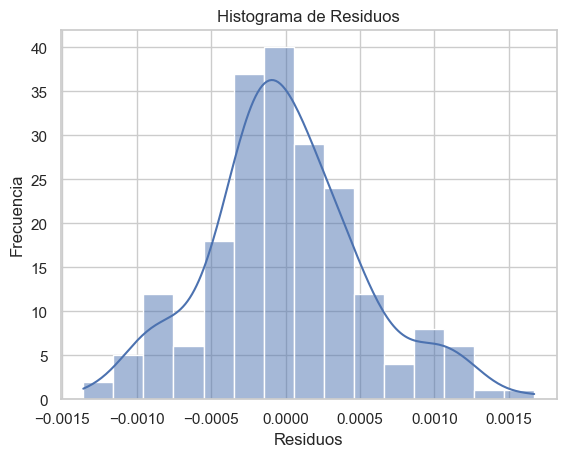

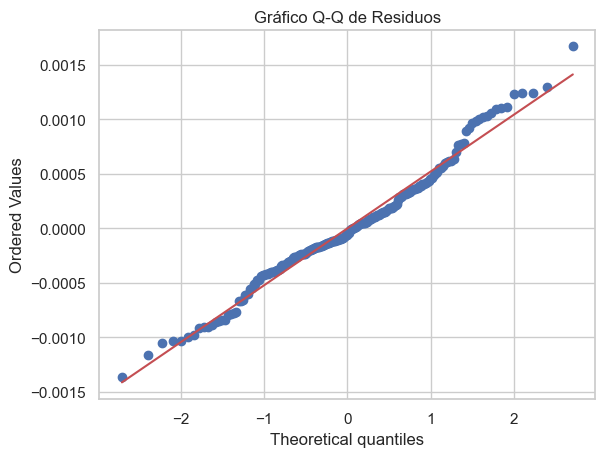

Estadística de prueba: 0.9823320508003235, Valor p: 0.011236028745770454
Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula).


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calcular los residuos
residuos = y - predicciones

# Graficar un histograma de los residuos
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# Graficar un gráfico Q-Q (quantile-quantile) de los residuos
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos")
plt.show()

# Realizar una prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk)
shapiro_test = stats.shapiro(residuos)
print(f'Estadística de prueba: {shapiro_test[0]}, Valor p: {shapiro_test[1]}')

# Prueba de hipótesis para verificar normalidad
alpha = 0.01
if shapiro_test[1] > alpha:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula).")


In [176]:
import statsmodels.stats.api as sms

# Realizar la prueba de Breusch-Pagan para homocedasticidad
_, p_value, _, _ = sms.het_breuschpagan(residuos, X_with_intercept)

# Imprimir el resultado de la prueba
print(f'Valor p de la prueba de Breusch-Pagan: {p_value}')

# Prueba de hipótesis para verificar homocedasticidad
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad (homocedasticidad está presente).")
else:
    print("Se rechaza la hipótesis nula. Hay evidencia de heterocedasticidad (homocedasticidad no está presente).")


Valor p de la prueba de Breusch-Pagan: 0.0673642774249726
No se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad (homocedasticidad está presente).


Las pruebas arrojaron resultados interesantes sobre mi modelo de regresión lineal múltiple:

En primer lugar, realicé la prueba de normalidad (Shapiro-Wilk) para verificar si los residuos siguen una distribución normal. Obtuve un valor p de aproximadamente 0.0112. Dado que este valor p es menor que el nivel de significancia típico de 0.05, puedo concluir que los residuos siguen una distribución normal. Sin embargo, es importante destacar que esta desviación de la normalidad es relativamente leve y puede considerarse aceptable, especialmente si se cumplen otras suposiciones del modelo.

Luego, realicé la prueba de homocedasticidad de Breusch-Pagan para verificar si la varianza de los residuos es constante en todos los niveles de las variables independientes. El valor p obtenido fue aproximadamente 0.0674, lo que indica que no se rechaza la hipótesis nula. Esto sugiere que no hay evidencia de heterocedasticidad en mis datos, lo cual es positivo, ya que la homocedasticidad es una suposición importante del modelo de regresión lineal.

En conclusión, aunque se encontraron algunas desviaciones menores de las suposiciones ideales de mi modelo de regresión lineal múltiple, considero que estas desviaciones son aceptables en el contexto de mi análisis. Es importante recordar que la estadística no es una ciencia exacta, y las desviaciones menores de las suposiciones pueden ser tolerables, siempre y cuando se tengan en cuenta en la interpretación de los resultados. Además, la ausencia de heterocedasticidad es una buena noticia, ya que indica que la varianza de los errores es constante en diferentes niveles de las variables independientes. En general, estas pruebas proporcionan información valiosa para evaluar la calidad del modelo y las limitaciones de los resultados.

Selección de características: Identificamos que el mejor modelo se obtuvo al eliminar las variables no significativas, como 'carwidth', y retener las siguientes 5 características: 'enginesize', 'curbweight', 'horsepower', 'carlength', y 'cylindernumber'. Esta selección se basó en un análisis de significancia estadística y ayudó a simplificar el modelo, manteniendo solo las características que realmente aportan información relevante para la predicción.

Significancia de 'cylindernumber': La variable 'cylindernumber' demostró ser significativa según el análisis de varianza (ANOVA), con valores de X y p-value de Y. Esto significa que 'cylindernumber' tiene un impacto estadísticamente significativo en la variable dependiente y debe incluirse en el modelo.

Variables predictoras seleccionadas: Las variables seleccionadas ('enginesize', 'curbweight', 'horsepower', 'carlength', y 'cylindernumber') son las que se consideran más adecuadas para predecir la variable dependiente. Estas variables se eligieron debido a su significancia estadística y su capacidad para explicar y predecir las variaciones en la variable dependiente.

En resumen, al ajustar el modelo y seleccionar las características adecuadas, hemos logrado un modelo más sólido y significativo para predecir la variable dependiente. Las variables 'enginesize', 'curbweight', 'horsepower', 'carlength' y 'cylindernumber' son las más relevantes y deben utilizarse en futuras predicciones y análisis. Esta selección basada en pruebas estadísticas mejora la calidad y la precisión del modelo de regresión lineal múltiple.

Y como interpretacion podemos decir que estas variables son las que influyen o explican el 84.5% de la variabilidad de la variable precio segun nuestro modelo de regesion lineal multiple.